# Qu'allons nous faire dans ce TP ? 🏗

Ce TP est là pour vous montrer que des problématiques GL peuvent être en partie solutionnées par des solutions d'IA. Un exemple d'IA pour le GL que vous connaissez sûrement est [Github CoPilot](https://github.com/features/copilot/) (suggestion de code basée sur des exemples Github). Ainsi, ce premier TP va vous montrer comment prédire le nombre de développeurs expérimenté pour un projet en fonction de la taille de ce dernier. Cet exemple est issu de nos travaux de recherche, la référence du papier de recherche est ici : 



*   *Quentin Perez, Christelle Urtado, Sylvain Vauttier. Mining Experienced Developers in Open-source Projects. ENASE 2022 - 17th International Conference on Evaluation of Novel Approaches to Software Engineering, Apr 2022, Online, France. pp.443-452*
*   URL vers le papier: [https://hal.mines-ales.fr/hal-03654959/document](https://hal.mines-ales.fr/hal-03654959/document)


Nous ferons également un peu de *data science*/statistiques pour vous montrer au travers de deux petits exemples à quoi cela peut servir.
Cependant attention, l'IA 🤖 n'est pas non plus Merlin l'Enchanteur 🧙 et ne peut donc pas aller au-delà de ses capacités. Elle est fortement dépendante du type d'apprentissage, de la méthode d'apprentissage et des données d'entrées. 

# Prérequis pour l'utilisation du notebook Colab **📦**

## ⚠ AVANT TOUTES MANIPULATIONS : FAIRE UNE COPIE DE CE NOTEBOOK COLAB DANS VOTRE ESPACE GOOGLE

Pour ce faire aller sur le menu "Fichier" puis "Enregistrer une copie dans Drive"


## Création de dossiers sur votre Google Drive

⚠ Vous devez impérativement créer à la racine de votre Google Drive le dossier "`TP_IAGL`" puis à l'intérieur de celui-ci créer les dossiers "`ck_metrics`" et "`metrics_by_dev`".

## Montage de votre Google Drive sur l'instance Colab

💾 La cellule *de* code plus bas va vous permettre de vous connecter à votre Google Drive afin de sauvegarder l'ensemble des éléments manipulés dans ce TP. Le lien pour accéder au dossier "`TP_IAGL`" sera <code>/content/drive/MyDrive/TP_GLIA</code> 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installation des bibliothèques et téléchargement des fichiers

Nous avons besoin de GitPython afin de manipuler des dépôts Git avec Python. La commande Colab ci dessous permet de l'installer. 

In [2]:
!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 6.2 MB/s 
     |████████████████████████████████| 62 kB 970 kB/s 


Récupération des différents fichiers de données nécessaires au TP depuis Github en utilisant wget.

In [ ]:
!wget -N https://github.com/qperez/TP-Master-MTP-GL-IA4GL/raw/main/ck_metrics/ck.jar -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://github.com/qperez/TP-Master-MTP-GL-IA4GL/raw/main/classifier_rf.pkl -P /content/drive/MyDrive/TP_GLIA/
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/dataset_dev_anonymized.csv -P /content/drive/MyDrive/TP_GLIA
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-1.6.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-2.0.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-2.1.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-2.2.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-2.3.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-2.4.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-3.0.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-3.1.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-4.0.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-4.1.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-5.0.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/ck_metrics/class_broadleaf-5.1.0-GA.csv -P /content/drive/MyDrive/TP_GLIA/ck_metrics
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-1.6.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-2.0.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-2.1.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-2.2.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-2.3.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-2.4.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-3.0.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-3.1.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-4.0.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-4.1.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-5.0.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-5.1.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-5.2.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-6.0.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev
!wget -N https://raw.githubusercontent.com/qperez/TP-Master-MTP-GL-IA4GL/main/metrics_by_dev/broadleaf-1.5.0-GA_broadleaf-6.1.0-GA_aggregated.csv -P /content/drive/MyDrive/TP_GLIA/metrics_by_dev


Import des lib nécessaires au Notebook.

In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import KMeansSMOTE
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import glob
import joblib
from collections import Counter

import os
import re
import subprocess
import glob
from git import Repo, Git

from matplotlib import pyplot as plt

## Exécution des cellules nécessaires au TP

Fonction permettant de supprimer les colonnes inutiles dans le jeu de données de développeurs.

In [4]:
# Prend un dataframe Pandas en paramètre
def delete_unused_columns(df):
    columns_to_drop = ["name", "followers", "commit_count_a", "source", "job", "name_without_spaces", "from", "to",
                       "project", "index", "AddSM","DelSM","ChurnSM","SumAddDelSM","SumAddDel"]

    for column_to_drop in columns_to_drop:
        if column_to_drop in df.columns :
            df.drop(columns=[column_to_drop], inplace=True)

    df["DiP"] = df["DiP"].round()

Fonction permettant d'appliquer un logarithme les colonnes du jeu de données de développeurs.


In [5]:
# Prend un dataframe Pandas en paramètre
def log_dataframe(df):

    columns_4_log = ["SumAddDelLOC", "DiP", "NoC", "SumAddDelF",
                     "SumAddDelSAM", "AddLOC", "DelLOC", "AddSAM", "DelSAM"]

    for column in columns_4_log:
        df[column] = np.log(df[column] + 1)

---
# Début du TP 🚀

## 1) Récupération des métriques de BroadleafCommerce 🧲

Nous travaillerons avec les versions majeures et mineures (voir [semantic versioning](https://semver.org/lang/fr/)) du projet BroadleafCommerce disponible sur GitHub : [https://github.com/BroadleafCommerce/BroadleafCommerce](https://github.com/BroadleafCommerce/BroadleafCommerce). Pour cela, nous allons cloner le dépôt puis récupérer les tags des versions et les filtrer par une expression régulière. Puis, pour chacun de ces tags, "checkouter" la version correspondante. Nous lancerons ensuite l'extraction des métriques à l'aide de l'application Java : ck ([https://github.com/mauricioaniche/ck](https://github.com/mauricioaniche/ck)). Cette application créée par Maurício Aniche est dédiée à l'extraction de plusieurs métriques logicielles dont le nombre de lignes de code que nous utiliserons plus tard. 

Dans ce TP, nous allons extraire "manuellement" métriques mais, les plateformes d'intégration continue comme Jenkins ou les outils d'analyse statique comme SonarQube permettent de calculer des métriques de manière automatique à chaque version releasée ou commitée sur votre système de gestion de versions. 


Pour notre cas d'étude, nous allons : 

1. Utiliser le package GitPython et sa [documentation](https://gitpython.readthedocs.io/en/stable/)) pour :

* Cloner le dépôt Github de BroadleafCommerce à l'endroit indiqué par la variable <code> PATH_TO_REPO </code> à l'aide de la méthode <code> Repo.clone_from </code>
* Créer un objet <code> Repo </code> qui vous permettra de récupérer les tags des versions
* Créer un objet <code> Git </code> qui vous permettra de "checkouter" la version désirée

2. Récupérer la liste des tags du dépôt à l'aide de l'objet <code> Repo </code>.

3. Itérer sur la liste des tags, où pour chaque tag vous allez : 

* Vérifier par une regexp que l'on se situe sur des tags ayant la forme <code> broadleaf-X-Y-0-GA </code> où <code> X </code> et <code> Y </code> peuvent varier entre 0 et 9 et où le tag a une taille fixe (utilisation de ^ et $ pour matérialiser le début et la fin de chaine de caractères)
* Exclure les version <code>1.5.0</code> et <code>6.2.0</code>, nous n'en aurons pas besoin dans ce TP.
* Vérifier que l'on ne va pas extraire les métriques d'une version déjà présente dans le dossier <code> ck_metrics </code>
* **/!\ Une fois ces vérifications effectuées,** checkouter la version désirée à l'aide du tag
* Lancer l'extraction des métriques à l'aide de l'instruction Colab suivante : <code> !java -jar /content/drive/MyDrive/TP_GLIA/ck_metrics/ck.jar /content/BroadleafCommerce false 0 false </code>
* Renommer le fichier <code> class.csv </code> en <code> class_[tag].csv </code> et supprimer le fichier <code>method.csv</code> créés par ck. 

**Il est normal que le processus d'extraction prenne une dizaine de minutes car nous analysons l'ensemble des fichiers Java de chaque version du projet. N'hésitez pas à printer pour connaitre l'opération actuellement effectuée**

In [6]:
PATH_TO_REPO = "/content/BroadleafCommerce" # Ne pas modifier cette URL

# Nous stockons les fichiers de code de BroadleafCommerce directement sur le disque de l'instance colab
# et pas sur le Drive Google pour des questions d'espace disque mais surtout de temps de
# calcul avec CK. CK fait de nombreuses opérations de lecture ce qui est extrêmment couteux 
# à faire directemment sur le point de montage du Drive Google.

#Créer les objets Git et repo ici avant l'instruction change directory
repo = Repo.clone_from("https://github.com/BroadleafCommerce/BroadleafCommerce", PATH_TO_REPO)
# repo = Repo(PATH_TO_REPO) 
git = repo.git

tags = repo.tags
regex = re.compile("^broadleaf-[0-9]\.[0-9]\.0-GA$")

alreadyKnownVersions = os.listdir("/content/drive/MyDrive/TP_GLIA/ck_metrics")
unknownVersions = []

for tag in tags: 
  if re.search(regex, str(tag)):
    if str(tag) != "broadleaf-1.5.0-GA" and str(tag) != "broadleaf-6.2.0-GA":
      if ("class_"+str(tag)+".csv") not in alreadyKnownVersions:
        # print(tag) 
        unknownVersions.append(tag)

print(unknownVersions)

wd_notebook = os.getcwd()
os.chdir("/content/drive/MyDrive/TP_GLIA/ck_metrics")

#Placer l'ensemble du code nécessaire à l'extraction ici
for ver in unknownVersions:
  print("Checkout dans : " + str(ver))
  git.checkout(ver)
  !java -jar /content/drive/MyDrive/TP_GLIA/ck_metrics/ck.jar /content/BroadleafCommerce false 0 false
  os.rename('class.csv', 'class_'+str(ver)+'.csv')
  print("  done.")


# os.remove("method.csv")
os.chdir(wd_notebook)

[]


---

## 2) Utilisation du classifieur de développeurs (Random Forest 🌲)
 
Nous allons maintenant utiliser le classifieur de développeurs sauvegardé sous le nom "classifier_rf.pkl" dont le chemin d'accès est : `/content/drive/MyDrive/TP_GLIA/classifier_rf.pkl` . Pour cela nous allons charger le classifieur à l'aide de <code> joblib.load </code> ([documentation](https://joblib.readthedocs.io/en/latest/generated/joblib.load.html))

2. Nous allons utiliser les métriques (23) associées à des développeurs, celles-ci sont stockées dans le dossier <code> /content/drive/MyDrive/TP_GLIA/metrics_by_dev/ </code>. Chaque fichier de ce dossier est nommé en fonction de la version sur laquelle les métriques ont été extraites. Nous allons donc itérer sur la **liste de ces fichiers ordonnée par ordre alphanumérique**. 

4. Pour chaque fichier CSV, l'ouvrir avec Pandas en tant que Dataframe via la fonction : <code> pd.read_csv </code> ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html))

3. Ces métriques sont à l'état "brute" dans les fichiers, c'est-à-dire qu'elles ont des échelles et des unités différentes. Le classifieur Random Forest que nous avons entrainé lui, ne travaille qu'avec des variables comprises dans [-1;1]. Ici, il va donc falloir faire une mise à l'échelle des variables à l'aide d'un scaler de Scikit-Learn : <code> MinMaxScaler </code> ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)). De plus, afin de réduire les écarts de valeurs sur certaines variables nous allons appliquer un logarithme sur 11 de ces dernières à l'aide de la fonction  <code> log_dataframe </code> de ce Notebook.

5. Prédire ensuite la catégorie des développeurs (`NSSE` (*Non-Senior Software Developper*) ou `SSE`(*Senior Software Developper*)) puis la stocker dans le dictionnaire <code> dict_classified_dev </code>. Faire un petit affichage à l'aide print pour visualiser l'évolution du nombre de dévoloppeurs dans chaque catégorie au fur et à mesure des versions.  


In [7]:
dict_classified_dev = {'SSE' : [], 'NSSE' : []}
list_versions = []

rf = joblib.load("/content/drive/MyDrive/TP_GLIA/classifier_rf.pkl")

#Placer la suite du code ici
metrics = sorted(os.listdir("/content/drive/MyDrive/TP_GLIA/metrics_by_dev/"))

scaler = MinMaxScaler(feature_range=(-1, 1))

for m in metrics:
  df = pd.read_csv("/content/drive/MyDrive/TP_GLIA/metrics_by_dev/" + str(m))
  delete_unused_columns(df)
  log_dataframe(df)

  df = scaler.fit_transform(df)

  result = rf.predict(df)
  list_versions.append(m.split("_")[1])
  dict_classified_dev['SSE'].append(result.tolist().count('SSE'))
  dict_classified_dev['NSSE'].append(result.tolist().count('NSSE'))
  # print(str(m.split("_")[1]) + " : {SSE : " + str(result.tolist().count('SSE')) + ", NSSE : " + str(result.tolist().count('NSSE')) + "}" )


print("-*-*-*-*-*-*-")
print(list_versions)
print(dict_classified_dev)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


-*-*-*-*-*-*-
['broadleaf-1.6.0-GA', 'broadleaf-2.0.0-GA', 'broadleaf-2.1.0-GA', 'broadleaf-2.2.0-GA', 'broadleaf-2.3.0-GA', 'broadleaf-2.4.0-GA', 'broadleaf-3.0.0-GA', 'broadleaf-3.1.0-GA', 'broadleaf-4.0.0-GA', 'broadleaf-4.1.0-GA', 'broadleaf-5.0.0-GA', 'broadleaf-5.1.0-GA', 'broadleaf-5.2.0-GA', 'broadleaf-6.0.0-GA', 'broadleaf-6.1.0-GA']
{'SSE': [1, 6, 6, 7, 7, 7, 7, 7, 7, 8, 11, 12, 12, 14, 15], 'NSSE': [3, 2, 2, 3, 3, 3, 4, 9, 21, 24, 21, 23, 29, 37, 41]}


---

## 3) Extraction du nombre total de lignes de code depuis les fichiers CSV 📂

Nous avons classé les développeurs par catégorie pour chaque version de BroadleafCommerce. 
L'étape suivante est d'extraire le nombre total de ligne de code pour chaque version de BroadleafCommerce. Pour cela chacun des fichiers triés par ordre alphanumérique croissant doit être ouvert avec Pandas. Vous devez ensuite faire la somme de la colonne "`loc`" (*Lines Of cCodes*) des fichiers et l'ajouter à la liste <code> loc_by_versions </code>.

In [8]:
#Liste où ajouter la somme des loc pour chaque version
loc_by_versions = []

files = sorted(os.listdir("/content/drive/MyDrive/TP_GLIA/ck_metrics/"))
files.remove('ck.jar')
for f in files:
  df = pd.read_csv("/content/drive/MyDrive/TP_GLIA/ck_metrics/" + str(f))
  count = 0
  for val in df['loc']:
    count += val 

  loc_by_versions.append(count)
  #print(str(f) + " : " + str(count))



---



## 4) Tracé du graphique du nombre de développeurs SSE et nombre de lignes de code par version de BroadleafCommerce 〽

L'objectif ici est de tracer à l'aide du package matplotlib ([documentation](https://matplotlib.org/stable/contents.html)) un graphique à 3 axes comme montré dans la figure d'exemple ci-dessous. 

![Évolution du nombre de développeurs SSE vs LOC](https://github.com/qperez/TP-Master-MTP-GL-IA4GL/raw/main/plot_sse_vs_loc_by_version.png)

En traçant cette figure vous devriez observer une particularité commune aux deux courbes, faite part de cette observation dans la case textutelle ci-desssous. 

**▶ 🔎 Observations :**

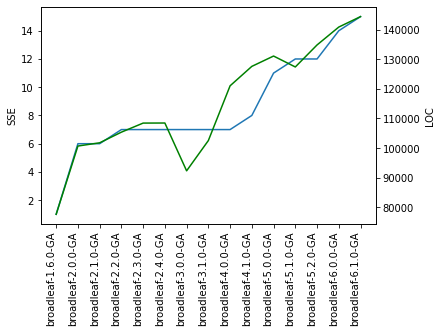

In [9]:
#Création de l'objet figure et axis
fig, ax1 = plt.subplots()

plt.xticks(rotation=90, ha='right')
ax1.plot(list_versions, dict_classified_dev['SSE'])
ax1.set_ylabel("SSE")

#Création d'un deuxième axe Y 
ax2 = ax1.twinx()
ax2.plot(loc_by_versions, color='green', label='Lines of Code')
ax2.set_ylabel("LOC")

plt.show()

---

## 5) Création d'un estimateur du nombre de développeurs expérimentés en fonction de la taille du projet (LoC) 🧙


Nous avons maintenant l'ensemble des données permettant de créer un estimateur du nombre de développeurs expérimentés en fonction du nombre de ligne de code du projet. 
Pour ce faire, nous allons mettre en oeuvre un estimateur basé sur une régression linéaire : <code> LinearRegression </code> ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Cet estimateur utilise la méthode des moindres carrés afin d'ajuster une droite d'équation $ax+b+e$ où $a$ est le coefficient directeur, $b$ l'ordonnée à l'origine et $e$ l'erreur liée aux moindres carrés. 

Pour cela nous allons : 
1. Créer un objet LinearRegression et l'ajuster sur <code> X </code> et <code> y </code> à l'aide de la méthode <code> fit </code>.
2. Afficher le coefficient de régression sur <code> X </code> et <code> y </code>.
3. Déterminer le coefficient de détermination linéaire avec la fonction <code> r2_score </code> ([documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)) qui mesure l'ajustement entre les prédiction du classifieur sur les données <code> X </code> par rapport aux sorties <code> y </code>, plus il proche de 1 meilleures sont les prédictions. 
4. Prédire le nombre de développeurs expérimentés SSE pour 150000, 180000 et 200000 lignes de code. 
5. Tracer un graphique semblable à la figure d'exemple ci-desssous :

![](https://github.com/qperez/TP-Master-MTP-GL-IA4GL/raw/main/plot_sse_loc_prediction.png)

Les points noirs sont les données déjà connues à savoir le nombre de développeurs expérimentés et le nombre de lignes de code pour chaque version. Les point rouges correspondent aux trois valeurs prédites pour 150000, 180000 et 200000 lignes. La droite bleu est la droite de régression. Pour tracer ce graphique vous pouvez vous inspirer de cet [exemple Scikit-Learn ](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py). 

Voilà vous êtes maintenant capable de prédire vos besoins en ressources humaines en fonction de la taille de votre projet :) ! 

Score : 0.8584605562653664
Coef : 0.8351241152530238


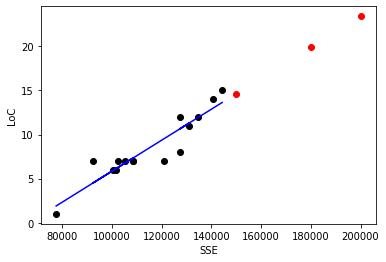

In [10]:
from sklearn.metrics import r2_score

#Valeurs X et y à utiliser pour créer et évaluer le régresseur
X = np.array(loc_by_versions).reshape(-1,1)
y = np.array(dict_classified_dev["SSE"])

regression = LinearRegression().fit(X, y)
result = regression.predict(X) 
print("Score : " + str(regression.score(X, y)))

coef = r2_score(result, y)
print("Coef : " + str(coef)) 

X_predict = np.array([150000, 180000, 200000]).reshape(-1, 1)
Y_predict = regression.predict(X_predict)

values = [regression.coef_ * i + regression.intercept_ for i in loc_by_versions]


plt.scatter(X, y, color='black')
plt.scatter(X_predict, Y_predict, color='red')
plt.plot(loc_by_versions, values, color='blue')
plt.xlabel("SSE")
plt.ylabel("LoC")

plt.show()

---

## 6) Matrice de corrélation sur une version du projet 🔢

Nous allons étudier les potentielles corrélations entre variables de qualité pour une version donnée du projet. En effet, des corrélations positives ou négatives pourraient indiquer les facteurs qui font croitre ou décroitre la qualité du projet. Cela peut par la suite aider à la compréhension des facteurs de réussite/échec d'une version, de la complexité de sa maintenance ou encore des leviers (nombre de lignes de code, couplages, etc) sur lesquelles travailler pour améliorer la qualité du projet.

Pour étudier ces corrélations, nous allons utiliser la version `broadleaf-6.1.0-GA` (fichier `class_broadleaf-6.1.0-GA.csv`) et la liste de métriques suivantes : 

* `cbo` : Coupling Between Objects ➡ Mesure la dépendance d'une classe à d'autres classes du projet en utilisant les déclarations d'attributs, les types de retour de méthode, les déclarations de variables, etc.
* `loc` : Lines Of Code ➡ Mesure le nombre de lignes de code de chaque fichier
* `wmc` : Weight Method Class ou mesure de McCabe ➡ Mesure la complexité cyclomatique (nombre de chemins d'exécution possibles) dans les méthodes.
* `dit` : Depth Inheritance Tree ➡ Mesure la profondeur d'héritage des classes.

Vous allez devoir : 

*   Ouvrir le fichier CSV avec pandas
*   Extraire un sous ensemble du dataset pour ne conserver que `'cbo','wmc','loc','dit'`
*   Créer une matrice de corrélation à partir de l'API de pandas et plus particulièrement de la méthode `corr(...)` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). **/!\ La méthode de corrélation à utiliser est Spearman**.
*   Plotter la heatmap montrant les corrélations entre les variables avec la librairie Seaborn et la méthode `heatmap(...)` ([documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). N'oubliez pas de faire figurer les coefficients sur votre heatmap.

Donner votre avis sur cette matrice de corrélation. Quel effet semble avoir la taille des fichiers les autres variables ? Que peut-on en déduire ? Répondez dans la case observations ci-dessous.

**▶ 🔎 Observations :**

WMC et LOC sont très corélés, de manière assez logique plus on a de code, plus on aura de chemins d'exécution possibles. 

La profondeur d'héritage n'est corélée a rien.

La dépendance des classes entre elles augmente avec le nombre de lignes de code.

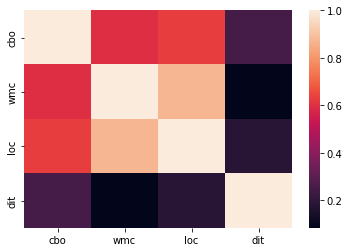

In [11]:
#Votre code ici
df = pd.read_csv("/content/drive/MyDrive/TP_GLIA/ck_metrics/class_broadleaf-6.1.0-GA.csv" )

df = df[['cbo', 'wmc','loc', 'dit']]
# df.corr(method='spearman')

sns.heatmap(df.corr(method='spearman'))

## 7) Étude de la relation entre le fait d'être développeur expérimenté et de développer plusieurs projets sur Github ❓

Une question que nous pouvons nous poser concernant des développeurs expérimentés est: 

> Existe-t-il une relation ou non entre le fait de contribuer à plusieurs projets et le fait d'être expérimenté ?

Cette question pourrait se poser par exemple en entreprise pour déterminer si un développeur a un intérêt à travailler sur différents projets afin de gagner en expérience d'un point de vue quantitatif, ou si les développeurs ayant formation particulière sont de "meilleurs développeurs". 

Pour répondre à cette question nous allons utiliser un outil mathématique qui s'appelle le test du [khi-deux](https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2). Ce test va permettre de tester la relation entre 2 variables catégorielles (ici de le fait d'être expérimenté ou non et de participer ou non à plusieurs projets sur Github). 

Pour cela il faut premièrement formuler deux hypothèses statistiques :

*   Une hypothèse $H_0$ dite "hypothèse nulle" ➡ Formalise le fait que les variables sont indépendantes  

> $H_0$ : Il n'y a pas de relation entre le fait d'être expérimenté ou non et de participer ou non à plusieurs projets sur Github.


*   Une hypothèse $H_1$ dite "hypothèse alternative" ➡ Formalise le fait que ces variables sont dépendantes l'une de l'autre.

> $H_1$ : Il y a une relation entre le fait d'être expérimenté ou non et de participer ou non à plusieurs projets sur Github.

Puis calculer le khi-deux et sa $p$-value. Ces hypothèses vont être acceptées ou rejetées en fonction d'un seuil de risque $\alpha$ (généralement 0.05) et le $p$-value calculée par lors du test du khi-deux. 

*   Si $p$ < $\alpha$ => Rejet de l'hypothèse $H_0$ et acceptation de $H_1$
*   Sinon rejet de l'hypothèse $H_1$ et acceptation de $H_0$

Ainsi pour réaliser ce test il faut: 

*   Trouver les développeurs appraissant plusieurs fois dans le fichier `/content/drive/MyDrive/TP_GLIA/dataset_dev_anonymized.csv`. Un développeur "dupliqué" est un développeur ayant même nom (colonne`'name_without_spaces'`) et même statut (colonne `'job'`) dans le dataset. Pour cela aidez-vous de la méthode `duplicated(...)` de pandas ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)). Cette méthode vous permettra de marquer chaque développeur comme dupliqué ou non en rangeant cette valeur dans une nouvelle colonne du dataframe nommée `'multi_project'`.
*   Ne conserver que les colonnes `'name_without_spaces'`, `'multi_project'` et `'job'`
*   Remplacer l'ensemble des étiquettes `'SA'` (*Software Architect*) de la colonne `'job'` par `'SSE'` (*Senior Software Engineer*).
* Remplacer toutes les étiquettes différentes de  `'SSE'` (*Senior Software Engineer*) par `'NSSE'` (*Non-Senior Software Engineer*)
* Créer une table de contingence en faisant un `pivot_table(..., aggfunc=len)` sur le dataset ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)) 
* Printer la table de contingence 
* Calculer le khi-deux à l'aide la méthode `chi2_contingency(...)` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)) de la bibliothèque SciPy 
* Printer les valeur calculées par la méthode puis répondez dans la case observations plus bas quelle hypothèse nous pouvons accepter avec un risque $\alpha = 0.05$. Donnez également la valeur de $p$-value



**▶ 🔎 Observations :**

In [12]:
from scipy.stats import chi2_contingency
#Votre code ici
df = pd.read_csv("/content/drive/MyDrive/TP_GLIA/dataset_dev_anonymized.csv")

duplicated = df.duplicated(subset=['name_without_spaces', 'job'])

df['multi_project'] = 'Unknown'
for x in range(len(duplicated)):
  df['multi_project'][x] = str(duplicated[x])

df = df[['name_without_spaces', 'multi_project','job']]

for x in range(len(df)):
  if str(df['job'][x]) == 'SSE':
    df['job'][x] = 'NSSE'
  if str(df['job'][x]) == 'SA':
    df['job'][x] = 'SSE'
print(df.head())


table = pd.pivot_table(df, index='name_without_spaces', values=['job', 'multi_project'], aggfunc=len)
print(table)  

chi2_contingency(table)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


                name_without_spaces multi_project     job
0  390bddf403bec997f0c159d66266ffea         False    NSSE
1  e954e1629583314149ec4a9a61274b59         False  UNKNOW
2  40c4cd8c4b63fe464765241b592f0afb         False  UNKNOW
3  8146b404eabe18ed1fb9b35ba648dde8         False  UNKNOW
4  514ea5b357ada85714d65e62db3857ef         False     BOT
                                  job  multi_project
name_without_spaces                                 
000709f00897ee74f28c735253b04fe1    1              1
00baabf2a82c66b1e8b50cd22786ab39    4              4
0101ef0d99a2d30c309bfee8279cd8b6    1              1
0190f8b7b6675ab631d782d3ef40d8a1    1              1
01fac787f082a85b71116e2ee3dc88dc    2              2
...                               ...            ...
fe85280df9e0a9af6613edfae033ae85    1              1
fed32c4dfe682cbf87f07455218ea7bb    1              1
ff7e7de08b0b85902a801a515ad6cce5    2              2
ffc3cfe65c7fe43a939eedde7fd3ff63    1              1
ffc77e54131395e2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(0.0, 1.0, 598, array([[1., 1.],
        [4., 4.],
        [1., 1.],
        ...,
        [2., 2.],
        [1., 1.],
        [3., 3.]]))

---

## Bonus (Pas dans le TP)

Jusque là nous avons utilisé un classifieur Random Forest déjà entrainé puis sauvegardé au format Pickle (sérialisation). Dans le bloc de code ci-dessous vous trouverez le code qui a permis la création de ce classifieur. 

Ce code est découpé en plusieurs parties:

* Ouverture du CSV contenant les développeurs et leurs métriques avec Pandas
* Suppresssion des colonnes non utilisées pour la classification
* Transformation des variables (logarithme et mise à l'échelle)
* Création de l'objet permettant de générer des données synthétiques. Les données synthétiques permettent de contrebalancer le fait que nous n'ayons que peu de données dans la classe des développeurs expérimentés. 
* Création du classifieur ici un random forest
* Évaluation du classifieur via 4-fold stratifié ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold))
* Génération de données synthétiques sur l'ensemble du jeu de données puis entrainement du modèle
* Sauvegarde du modèle au format pickle

Vous pouvez modifier plusieurs choses qui vont influer sur la qualité de votre classifieur :  
- Les variables utilisées. Nous utilisons ici 23 métriques. Vous pouvez en supprimer dans le dataframe Pandas et constater l'effet. 
- Le scaler utilisé, ici un MinMax pour mettre les variables dans l'intervalle [-1,1] ([documentation sur les types de scaler](https://www.datacorner.fr/feature-scaling/))
- Le type de classifieur utilisé (ici Random Forest) et ses paramètres. Vous pouvez choisir un autre classifieur parmis ceux fournis par le package Scikit Learn ([documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py))
- L'utilisation ou non de la génération de données synthétiques. 



 

Returns labels (y)

In [ ]:
def get_labels(df):
    df.loc[df['job'] == "SA", 'job'] = "SSE"
    df.loc[df['job'] != "SSE", 'job'] = "NSSE"

    return df["job"]

Mise à l'échelle des données à l'aide du scaler donné en input

In [ ]:
def scaling(scaler, X):
    return scaler.fit_transform(X)

Création de données synthètiques avec la méthode SMOTE

In [ ]:
def create_synthetic_data(smote, X_scaled, y):
    return smote.fit_resample(X_scaled, y)

Entrainement du classifieur sur données synthétiques et affichage d'une rapport de classification

In [ ]:
def train_and_classification_report(classifier, X_synthetic, y_synthetic, X_scaled, y):
    classifier.fit(X_synthetic, y_synthetic)
    print(classification_report(y, classifier.predict(X_scaled)))

In [ ]:
def stratifiedKFold_scoring(classifier, X_scaled, y, smote = None):
    kf = StratifiedKFold(n_splits=4, shuffle=False)#, random_state=0)
    print("===> Start kfold <===")
    scores = {"F1": {"values" : []}, "Recall": {"values" : []},
              "Precision": {"values" : []}, "Balanced\nAccuracy" : {"values" : []}}

    for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, y), 1):
        print("=> Fold : ",fold)
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train = X_scaled[train_index]
        y_train = y[train_index]
        X_test = X_scaled[test_index]
        y_test = y[test_index]

        if smote is not None:
            X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train, y_train)
            classifier.fit(X_train_synthetic, y_train_synthetic)
        else:
            classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        f1 = f1_score(y_test, y_pred, pos_label="SSE")
        recall = recall_score(y_test, y_pred, pos_label="SSE")
        precision = precision_score(y_test, y_pred, pos_label="SSE")
        accuracy = balanced_accuracy_score(y_test, y_pred)

        scores["F1"]["values"].append(f1)
        scores["Recall"]["values"].append(recall)
        scores["Precision"]["values"].append(precision)
        scores["Balanced\nAccuracy"]["values"].append(accuracy)

    for key in scores:
        scores[key]["values"] = np.array(scores[key]["values"])
        scores[key]["mean"] = np.mean(scores[key]["values"])
        scores[key]["std"] = np.std(scores[key]["values"])
        scores[key]["ci95"] = np.std(scores[key]["values"]) * 2

        print(key, "mean :%0.4f" % scores[key]["mean"])
        print(key, "std : %0.4f" % scores[key]["std"])
        print(key, "95%% Confidence Interval +/- %0.4f" % (scores[key]["ci95"]))
        print()
    return scores

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TP_GLIA/dataset_dev_anonymized.csv")
y = get_labels(df)

delete_unused_columns(df)

log_dataframe(df)
scaler = MinMaxScaler(feature_range=(-1,1))

X = df
X_scaled = scaling(scaler, X)

#Instanciation du générateur de données synthétiques à l'aide de la méthode k-means SMOTE
smote = KMeansSMOTE(sampling_strategy='minority', random_state=9090)
#Création du classifieur RF
classifier = RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', n_estimators=75, random_state=0)

#Évaluation du classifieur à l'aide d'un 4-fold stratifié
stratifiedKFold_scoring(classifier, X_scaled, y, smote = smote)

#Génération de données synthétiques sur l'ensemble des données
X_synthetic, y_synthetic = smote.fit_resample(X_scaled, y)
#Entrainement du classifieur sur les données synthétiques
classifier.fit(X_synthetic, y_synthetic)
#Sauvegarde du classifieur (sérialisation) 
pickle.dump(classifier, open("/content/drive/MyDrive/TP_GLIA/classifier_rf.pkl", 'wb'))


===> Start kfold <===
=> Fold :  1
=> Fold :  2
=> Fold :  3
=> Fold :  4
F1 mean :0.7689
F1 std : 0.0263
F1 95% Confidence Interval +/- 0.0525

Recall mean :0.7538
Recall std : 0.0800
Recall 95% Confidence Interval +/- 0.1601

Precision mean :0.7937
Precision std : 0.0414
Precision 95% Confidence Interval +/- 0.0828

Balanced
Accuracy mean :0.8603
Balanced
Accuracy std : 0.0343
Balanced
Accuracy 95% Confidence Interval +/- 0.0687

